In [ ]:
User_agent = input("輸入自己的User-Agent：")

輸入表特版的文章的url：https://www.ptt.cc/bbs/Beauty/M.1626143125.A.7F4.html


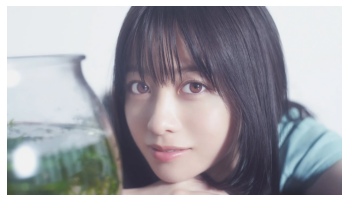

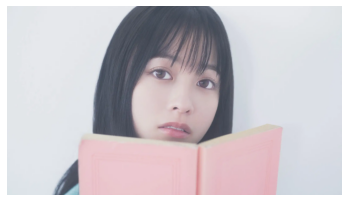

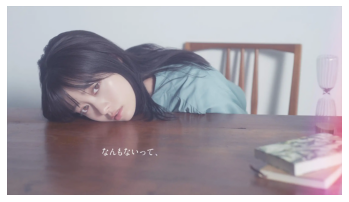

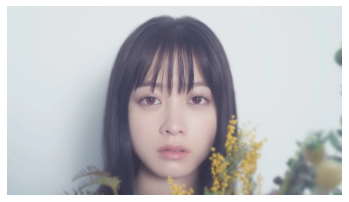

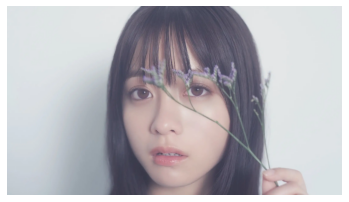

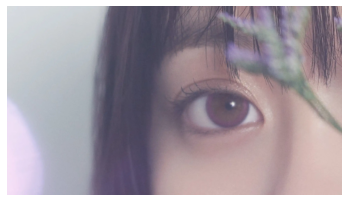

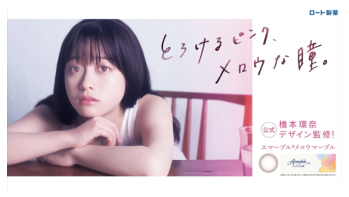

In [5]:
#爬取ptt表特版特定文章的圖片

import requests
import bs4
import shutil
import time
import cv2
import matplotlib.pyplot as plt

#連線
url = input("輸入表特版的文章的url：")
headers = {
    "cookie":"over18=1",
    #寫入自己的User-Agent
    "User-Agent":User_agent
}

response = requests.get(url=url,headers=headers)

#轉成beautifulsoup4
soup = bs4.BeautifulSoup(response.text,"html.parser")

#找出圖片並儲存
img_number = 1
#找出圖片的特色標籤
imgs = soup.find_all("a",target="_blank")
for img in imgs:
    #如果是圖片才動作
    if(img.string.find("imgur")!=-1):
        img_name = "ptt-beauty"+str(img_number)+".jpg"
        #stream=true 可強制解壓縮下載圖片
        img = requests.get(img.string,stream=True)
        #打開空的文件 並設定可寫入 wb用於圖片 若名稱不存在則會新增文件
        img_wb = open(img_name,'wb')
        #將圖片複製到文件內 img.raw可以找出圖片所在的記憶體位址
        shutil.copyfileobj(img.raw,img_wb)
        #寫完就關閉
        img_wb.close()
        #清除記憶體
        del img
        
        #讀圖片
        img_read = cv2.imread(img_name)
        plt.imshow(cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
        img_number += 1
        time.sleep(1)

In [5]:
#爬取ptt表特版特定關鍵字文章的圖片(可指定要爬幾頁)

import requests
import bs4
import shutil
import time

#定義函式：將找到的文章進行連線並儲存內部圖片
def connect(result_url,img_number):
    response2 = requests.get(url=result_url,headers=headers)
    soup2 = bs4.BeautifulSoup(response2.text,"html.parser")
    #找出圖片的特色標籤
    imgs = soup2.find_all("a",target="_blank")
    for img in imgs:
        #如果是圖片才動作
        if(img.string.find("imgur")!=-1):
            img_name = "ptt-beauty"+str(img_number)+".jpg"
            #stream=true 可強制解壓縮下載圖片
            img = requests.get(img.string,stream=True)
            #打開空的文件 並設定可寫入 wb用於圖片 若名稱不存在則會新增文件
            img_wb = open(img_name,'wb')
            #將圖片複製到文件內 img.raw可以找出圖片所在的記憶體位址
            shutil.copyfileobj(img.raw,img_wb)
            #寫完就關閉
            img_wb.close()
            #清除記憶體
            del img
            print("finish",img_number)
            img_number += 1
            time.sleep(1)
    return img_number

def beauty(page,keyword,img_number):
    #連線
    url = "https://www.ptt.cc/bbs/Beauty/search?page="+str(page)+"&q="+keyword
    response = requests.get(url=url,headers=headers)
    #轉成beautifulsoup4
    soup = bs4.BeautifulSoup(response.text,"html.parser")
    #找出標題的特色標籤
    keyword_title = soup.find_all("div",class_="title")
    for result in keyword_title:
        #找出url
        result_url = "https://www.ptt.cc"+result.a["href"]
        #連進url
        img_number = connect(result_url,img_number)
    return img_number

page_count = input("請輸入想爬的表特版頁數：")
try:
    int(page_count)
except:
    print("請輸入數字")
else:
    keyword = input("輸入文章標題關鍵字：")

    headers = {
            "cookie":"over18=1",
            #寫入自己的User-Agent
            "User-Agent":User_agent
    }

    #計算圖片的數量，同時避免相同圖片名稱
    img_number = 1
    for i in range(1,int(page_count)+1):
        img_number = beauty(i,keyword,img_number)

請輸入想爬的表特版頁數：d
請輸入數字
